# "trial05_02. [데이터 파편화 문제]  merge를 이용한 데이터 병합"
> "merge data table"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim gabe
- image: images/preprocessing/이미지1.png
- categories: [pandas, concat, merge, DataFrame]

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

- 데이터 베이스를 효율적으로 관리하기 위해 데이터가 특정 key 변수를 기준으로 나누어 저장되는 경우가 흔하다.
- SQL 에서는 Join을 이용해 해결 할 수 있고, python 에서는 pandas의 merge함수를 통해 해결 가능하다. 

# 관련 함수 : pandas.merge 함수
---

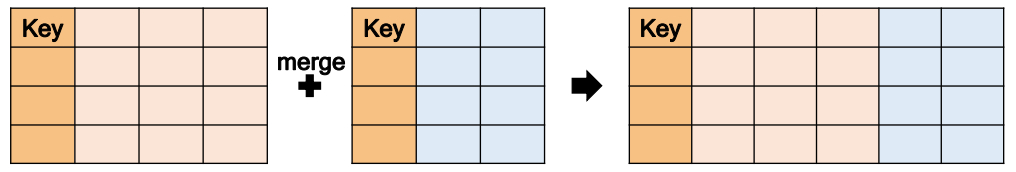

In [14]:
#hide_input
from PIL import Image
Image.open('이미지6.png')

---
주요 파라미터
- left : 통합 대상 데이터 프레임1
- right : 통합 대상 데이터 프레임2
- on : 통합기준 key 변수 or 변수 리스트 (생략시 이름이 동일한 변수를 key로 자동인식)
- left_on : 데이터 프레임 1의 key변수 or 변수 리스트
- right_on : 데이터 프레임 2의 key변수 or 변수 리스트
- left_index : 데이터 프레임 1의 index를 key변수로 사용할지 여부
- right_index : 데이터 프레임 2의 index를 key변수로 사용할지 여부

- 보통은 간단한 merge를 통해 해결가능하지만, 종종 복잡한 케이스들이 발생할 수도 있다.
- 이때 중요한 것은 merge를 할때의 keypoint이다.

    1) 어떤 컬럼이 key value를 할 수 있는지 확인하고, 전처리를 통해 key value를 통일시킨다.
    
    2) 레코드 단위를 명확히 한다.

# merge 기본: on의 활용

In [3]:
df1 = pd.read_csv("Telco_churn_customer_churn.csv")
df2 = pd.read_csv("Telco_churn_customer_info.csv")

In [4]:
df1.head()

,customerID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes


In [5]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
# 두 데이터프레임에서 이름이 같은 변수가 1개만 있어도(key 변수), 가급적 on을 사용하는 것이 좋다.
merged_df = pd.merge(df1, df2, on = 'customerID') 

In [7]:
merged_df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,Female,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Yes,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,No,Male,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Yes,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


# left_on과 right_on의 활용

In [8]:
# 예제를 위해 df2의 customerID 컬럼명을 ID로 변환
df2.rename({"customerID":"ID"}, axis = 1, inplace = True)

In [9]:
df1.head()

,customerID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes


In [10]:
df2.head()

,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [11]:
# 데이터 프레임1은 customerID를 key value로, 데이터 프레임2는 ID를 kye value로 해서 merge
merged_df = pd.merge(df1, df2, left_on = ['customerID'], right_on = ['ID']) 

# left, right 순서를 반드시 고려해야 한다.
# on, left_on, right_on 키워드에 리스트 형태로 입력받을 수도 있음 (물론, 여기서도 순서가 중요하다.)

In [12]:
merged_df.head() # 키 컬럼 두 개가 모두 살아있음

,customerID,Churn,ID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,No,5575-GNVDE,Male,0,No,No,34,Yes,No,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Yes,3668-QPYBK,Male,0,No,No,2,Yes,No,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,No,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Yes,9237-HQITU,Female,0,No,No,2,Yes,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [13]:
# 컬럼명만 다르고 사실상 동일한 데이터이기 때문에 하나를 삭제해주는게 좋다.
merged_df.drop('ID', axis = 1, inplace = True) 